## Binary classification on non-linear data (circles)

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [9]:
# Non-linear separable data
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42) # randome_state is a seed for generation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=42) # spliting the datasets into train(80%) and test (20%)
# y_train y_test is the label row in matrix

In [10]:
# 1) CREATE (use non-linear activations + sigmoid output)
model = tf.keras.Sequential([
 tf.keras.layers.Input(shape=(2,)), # Input is 2D (1,1)
 tf.keras.layers.Dense(16, activation="relu"), # hidden layer 16 neurons
 tf.keras.layers.Dense(16, activation="relu"), # hidden layer 16 neurons
 tf.keras.layers.Dense(1, activation="sigmoid") # 1 neuron output probability
])

In [11]:
# 2) COMPILE
model.compile(
 loss="binary_crossentropy", # [0,1] probability
 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
 metrics=["accuracy"]
 )

In [12]:
# 3) FIT
history = model.fit(X_train, y_train, epochs=25, verbose=0) 
# verobse metadata of training procces

In [13]:
# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.3f}")

Test accuracy: 1.000


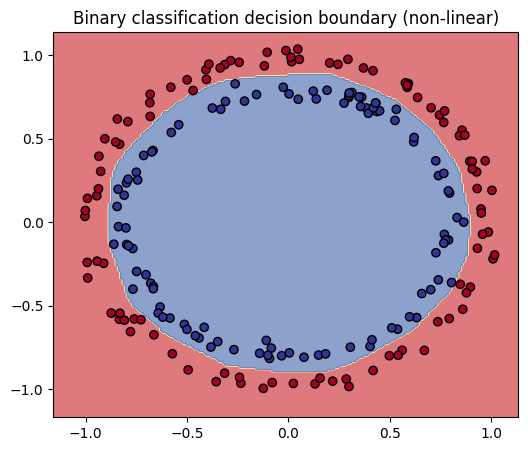

In [14]:
# Visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.1, X[:,0].max()+0.1, 200),
 np.linspace(X[:,1].min()-0.1, X[:,1].max()+0.1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid, verbose=0).reshape(xx.shape)
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, (probs>0.5).astype(int), cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title("Binary classification decision boundary (non-linear)")
plt.show()